## Understanding the Process

How are credit cards used and what can we understand about their use to identify credit card fraud? 

Credit cards have various uses, ranging from everyday expenses like gas and groceries to bigger expenditures like electronics or vacations. They can also come in handy for unexpected situations, such as car repairs or unexpected medical bills. Regardless of the purpose, people tend to exhibit certain spending patterns.

Apart from purchase trends, there are also patterns in how and where credit cards are used. For example, someone might consistently use their card in a particular city, or they might exclusively rely on the chip for transactions instead of making online purchases. These patterns can be monitored to detect potential fraud.

If a credit card that is typically used for small transactions suddenly shows large purchases, it could indicate fraudulent activity. Similarly, if the card is being used in a city where the cardholder neither resides nor works, it raises suspicion as well.

## Libraries for this project

All libraries for this project are listed in this block.

In [38]:
# linear algebra 
import numpy as np

# data processing library
import pandas as pd

# pyplot from matplotlib
import matplotlib.pyplot as plt

# high level visualization package
import seaborn as sns

# import library to generate training and testing datasets
from sklearn.model_selection import train_test_split

# import library to help scale features in the datsets
from sklearn.preprocessing import StandardScaler

# import K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

## Understanding the Data
Now that we have an understanding of some nuances to credit card usage lets take a look at the data. 
The next step is loading the data from a .csv file into a dataframe and view the raw data.

In [39]:
# read csv file to dataframe
df = pd.read_csv(r'./input/credit-card-fraud/card_transdata.csv')

# display dataframe
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


There are 1 million entries and 8 columns.

The columns names are:
* distance_from_home - Distance from home where transaction occured
* distance_from_last_transaction - Distance from where last transaction occured
* ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price
* repeat_retailer - Has historically purchased from retailer (1 = Yes / 0 = No)
* used_chip - Was chip used in transaction (1 = Yes / 0 = No)
* used_pin_number - Was PIN used to complete transaction (1 = Yes / 0 = No)
* online_order - Was transaction an online order (1 = Yes / 0 = No)
* fraud - Was transaction fraudulent (1 = Yes / 0 = No)

Based on how the data has been organized we can assume it doesn't represent a single client. Instead, it is a collection of transactions from many clients and likely from a single credit card company.

Features relating to distance have no unit of measure however, we can assume the unit of measure is the same across distance based features. We care more about relations between distance and other variables.

The data type of all features are float. Whether a boolean value is a float or an integer shouldn't have an impact on the model but for my own peace of mind and to quell my OCD we will be converting them to Integers.

Let's take a closer look at each feature.

In [40]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


The count of each column is exactly 1 million indicating all features are present in each record. In other words we don't have any missing values.

Approximately 88% of transactions were with a repeat retailer. 35% used a chip. 10% used a pin. 65 % were online orders.

Only 8.7% of transactions were fraudulent.

There's a pretty large gap between the minimum distance and max distance. The next step is grouping the distance and ratio values and generating a group, so we can compare the values to the number of fraudulent cases.

I used the percentage values from describe() to determine the grouping for each variable.

Distance from Home 
(0, 10]          500934
(10, 25]         242427
(25, 100]        206850
(100, 1000]       49303
(1000, 5000]        483
(5000, 11000]         3
Name: dist_home_group, dtype: int64


Distance from last transaction
(0, 1]           500294
(1, 2]           149981
(2, 3]            79373
(3, 100]         265092
(100, 1000]        5204
(1000, 5000]         55
(5000, 12000]         1
Name: dist_trans_group, dtype: int64


Ratio to median purchase price
(0.0, 0.5]        264451
(0.5, 1.0]        236428
(1.0, 1.5]        143620
(1.5, 2.0]         91758
(2.0, 10.0]       245829
(10.0, 50.0]       17724
(50.0, 100.0]        179
(100.0, 200.0]         9
(200.0, 250.0]         0
(250.0, 300.0]         2
Name: rtmpp_group, dtype: int64
Distance from Home 
Distance from last transaction
Ratio to median purchase price


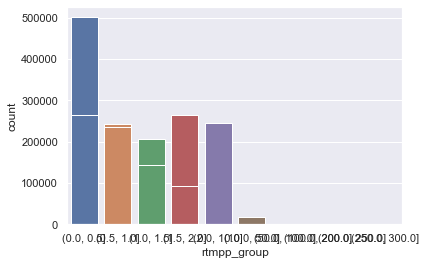

In [48]:
# create temporary dataframe
df_temp = df

# how distance from home groups are organized
dfh_groups = [0, 10, 25, 100, 1000, 5000, 11000]

# how distance from last transaction groups are organized
dflt_groups = [0, 1, 2, 3, 100, 1000, 5000, 12000]

# how ratio to median purchase groups are organized
rtmpp_groups = [0, .5, 1, 1.5, 2, 10, 50, 100, 200, 250, 300]

# split distance into groups
df_temp['dist_home_group'] = pd.cut(df['distance_from_home'], dfh_groups)
df_temp['dist_trans_group'] = pd.cut(df['distance_from_last_transaction'], dflt_groups)
df_temp['rtmpp_group'] = pd.cut(df['ratio_to_median_purchase_price'], rtmpp_groups)

# check number of entries with distances
print("Distance from Home ")
print(df_temp['dist_home_group'].value_counts().sort_index())
print("\n")
print("Distance from last transaction")
print(df_temp['dist_trans_group'].value_counts().sort_index())
print("\n")
print("Ratio to median purchase price")
print(df_temp['rtmpp_group'].value_counts().sort_index())

print("Distance from Home ")
sns.countplot(data=df_temp, x='dist_home_group')
print("Distance from last transaction")
sns.countplot(data=df_temp, x='dist_trans_group')
print("Ratio to median purchase price")
sns.countplot(data=df_temp, x='rtmpp_group')
plt.show()

In [42]:
# count number fraudulant transactions in distance group.
df_temp.groupby(['dist_home_group'])['fraud'].apply(lambda fraud: (fraud==1).sum())

dist_home_group
(0, 10]          35759
(10, 25]         15844
(25, 100]        13593
(100, 1000]      21996
(1000, 5000]       210
(5000, 11000]        1
Name: fraud, dtype: int64

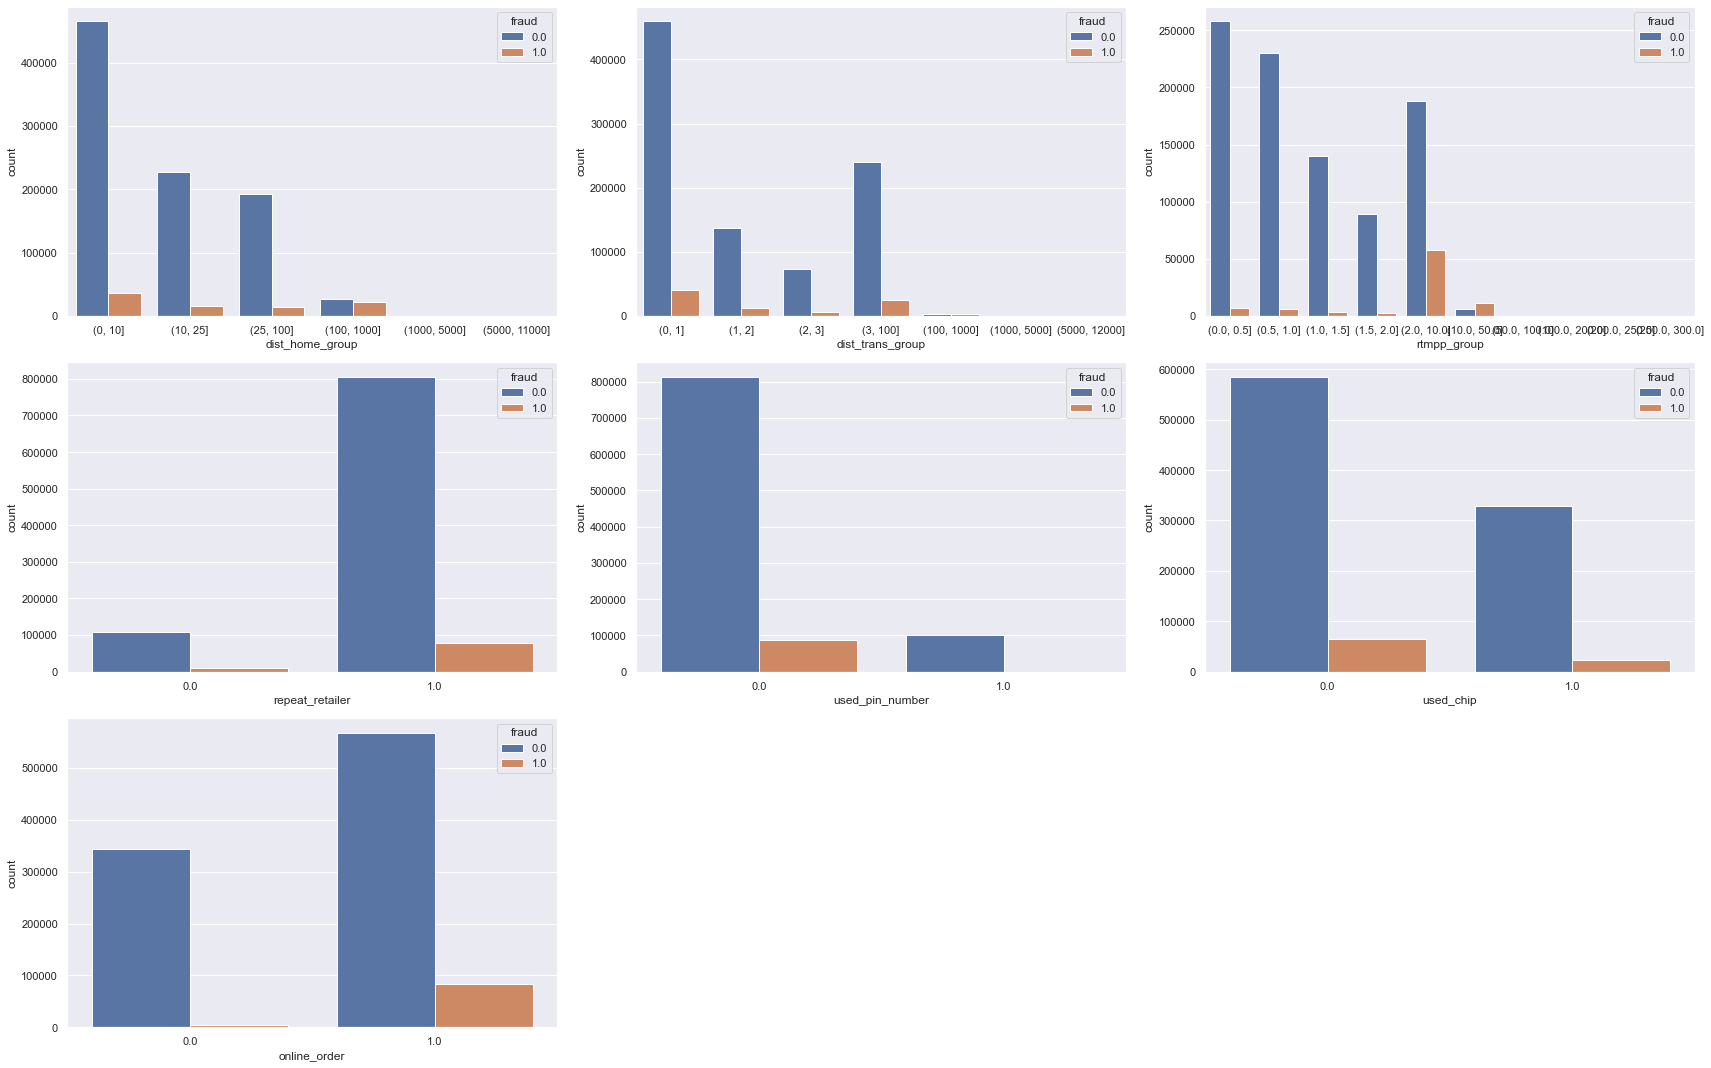

In [43]:
# Visualize the count of fraudulant transactions for columns 'dis_home_group', 
cols = [ 'dist_home_group', 'dist_trans_group', 'rtmpp_group', 'repeat_retailer', 
        'used_pin_number', 'used_chip', 'online_order']

n_rows = 3
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*8,n_rows*5))

# change the font size
sns.set(font_scale=1)

# Iterates through the matrix and places a graph
for r in range(0,n_rows):
    for c in range(0,n_cols): 
        # prevents out of range error and hides graph template
        if r == 2 and c > 0: 
            fig.delaxes(axs[r][c])
            fig.delaxes(axs[r][c+1])
            break 
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(x=df_temp[cols[i]], hue=df_temp["fraud"], ax=ax)
        ax.legend(title="fraud", loc='upper right') 
        
plt.tight_layout()   #tight_layout

From these graphs, there is a relation to high dollar purchases and fraudulent transactions. This makes sense. A scammer would want to extract as much money as possible before the card is blocked.

Fraud and repeated retailers suggests scammers using a retailer they are familiar with. If making purchases in person they know the inventory, or they are familiar with the online purchasing process.

It is no surprise fraudulent transactions occur without the chip or pin. Online orders allow more anonymous purchases and are quicker to process.

Next let's observe any correlation between variables. 

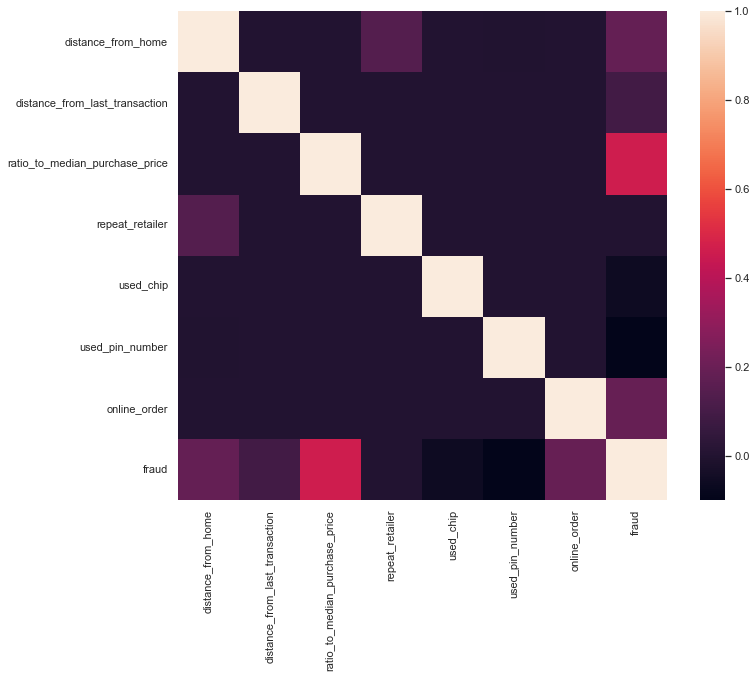

In [44]:
# Generate correlation matrix
corrmat = df_temp.corr()

# setup figure size
fig = plt.figure(figsize = (12, 9))

# assign data to a heatmap
sns.heatmap(corrmat, square = True)
plt.show()

## Anomaly Detection with Classification Algorithm

We will be using K Nearest Neighbors (KNN) to detect whether fraud occured or not. Before creating the model we will split the data. 80% training and 20% testing. This ratio is fairly standard to test a model.

KNN doesn't do well when feature values have different ranges. This could lead to unwanted bias in our model. To ensure we get the best results the data will be scaled using SKlearns Standard Scaler.

In [45]:
# split data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 0:6].values
Y = df.iloc[:, 7].values

# split dataset into 80% training set and 20% testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# scaling data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("completed")

completed


In [46]:
# create a KNN classifier container and place the training data into it.
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

# predict fraudulant transaction on test set
final_pred = knn.predict(X_train)

# print score
print('Accuracy Score of KNN: ' + str(knn.score(X_train, Y_train)))

Accuracy Score of KNN: 0.96784625
